         Dimensão da malha: 20 linhas/colunas
   Limite superior do erro: 1e-05 %
                 Iterações: 166
           Pontos iterados: 53784
 Tempo de Iteração (clock): 0.194 segundos


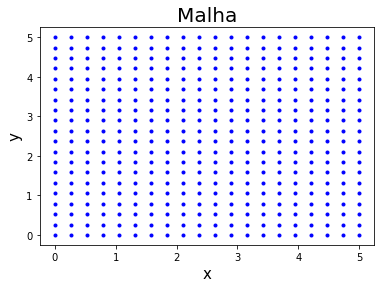

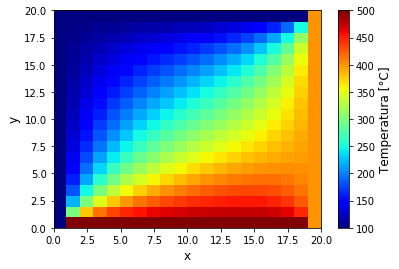

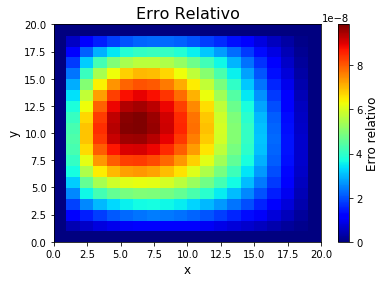

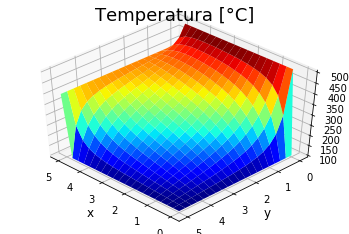

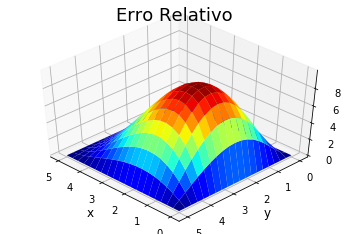

In [0]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 20

# Limite Superior do Erro
Lim = 1.0E-7

#################   MALHA   #################
X = Y = np.linspace(0, 5.0, n)
#X = np.arange(-1., 10.0, .1) 
#Y = np.arange(-1., 5.0, .1)





#################   CONDIÇÕES DE CONTORNO   #################

T = np.zeros([len(Y),len(X)])


# Entrada do usuário (opcional)
#Tinf =  float(input("Temperatura no lado esquerdo: "))
#Tsup =  float(input("Temperatura no lado direito: "))
#Tdir =  float(input("Temperatura no lado superior: "))
#Tesq =  float(input("Temperatura no lado inferior: "))


T[0,  :] = T_inf = 500#Tinf
T[-1, :] = T_sup = 100#Tsup
T[:, -1] = T_dir = 400#Tdir
T[:,  0] = T_esq = 100#Tesq

#print("T antes")
#print(T)


#################   SOLUÇÃO   #################



lamb = 1.5

# Auxiliares para o cálculo do erro relativo
erro = np.zeros([len(X),len(Y)]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

# Matriz auxiliar para T
Taux = np.zeros([len(X),len(Y)])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

while np.any(erro > Lim):
    for i in range(1,len(X)-1):
        for j in range(1,len(Y)-1):
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            Taux[i,j] = T[i,j]
            loops += 1
    iterac += 1

t2 = time.clock()

print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", np.round(Lim*100, 10), "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")



#################   PLOTS   #################


###### Plot Malha
xx, yy = np.meshgrid(X, Y, sparse=False)


malha, ax_m = plt.subplots()
plt.plot(xx, yy, 'b.')
plt.title('Malha', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()



###### Plot 2D

#plt.figure(2)
fig2D, ax2D = plt.subplots() # Cria a figura com um subplot
pcolor(T, cmap='jet')
cbar = colorbar()

cbar.ax.set_ylabel('Temperatura [°C]', fontsize=12)
ax2D.set_xlabel('x', fontsize=12)
ax2D.set_ylabel('y', fontsize=12)
plt.show()



###### Plot Erro

fig2, ax2 = plt.subplots() # Cria a figura com um subplot
pcolor(erro, cmap='jet')  
cbar = colorbar()

ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
#savefig('E-5Erro.pdf')
plt.show()
#show()



###### Plot 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = T.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Temperatura [°C]', fontsize=18)


### Erro
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = erro.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_title('Erro Relativo', fontsize=18)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
plt.show()



Temperatura no lado inferior: 60
Temperatura no lado esquerdo: d
Fluxo no lado esquerdo: -150
Temperatura no lado superior: d
Fluxo no lado superior: 0
Temperatura no lado direito: 100
[0. 1. 1. 0.]
         Dimensão da malha: 20 linhas/colunas
   Limite superior do erro: 0.01 %
                 Iterações: 1000
           Pontos iterados: 361000
 Tempo de Iteração (clock): 1.183 segundos


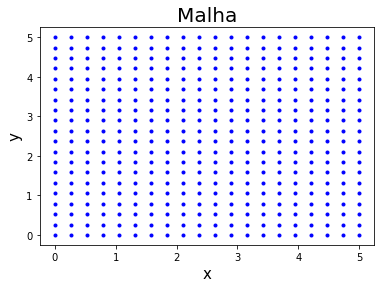

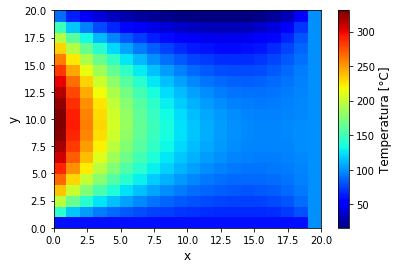

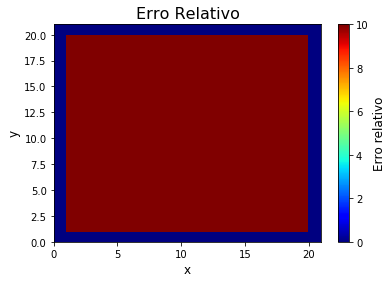

Text(0.5, 0.92, 'Temperatura [°C]')

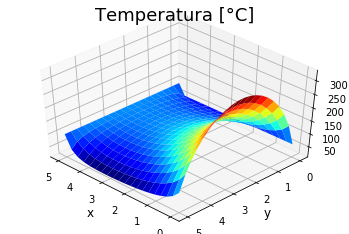

In [70]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 20

# Limite Superior do Erro
Lim = 1.0E-4

#################   MALHA   #################
X = Y = np.linspace(0, 5.0, n)
#X = np.arange(-1., 10.0, .1) 
#Y = np.arange(-1., 5.0, .1)
dx = X[1] - X[0]
dy = Y[1] - Y[0]



#################   CONDIÇÕES DE CONTORNO   #################
fluxo = np.zeros(4)
T = np.zeros([len(Y),len(X)])


# Entrada do usuário (opcional)
T_inf =  input("Temperatura no lado inferior: ")
if T_inf == 'd':
    T_inf = float(input("Fluxo no lado inferior: "))
    T = np.insert(T, 0, - 2*dx*T_inf, axis=0)
    fluxo[0] = 1
else: 
    T[0, :] = float(T_inf)
    
    
T_esq =  input("Temperatura no lado esquerdo: ")
if T_esq == 'd':
    T_esq = float(input("Fluxo no lado esquerdo: "))
    T = np.insert(T, 0, - 2*dy*T_esq, axis=1)
    fluxo[1] = 1
else: 
    T[:, 0] = float(T_esq)
    

T_sup =  input("Temperatura no lado superior: ")
if T_sup == 'd':
    T_sup = float(input("Fluxo no lado superior: "))
    T = np.insert(T, len(T[:,0]), -2*dx*T_sup, axis=0)
    fluxo[2] = 1
else: 
    T[-1, :] = float(T_sup)
    
    
T_dir =  input("Temperatura no lado direito: ")
if T_dir == 'd':
    T_dir = float(input("Fluxo no lado direito: "))
    T = np.insert(T, len(T[0, :]), -2*dy*T_dir, axis=1)
    fluxo[3] = 1
else: 
    T[:, -1] = float(T_dir)


#T[0,  :] = T_inf = 500#Tinf
#T[-1, :] = T_sup = 100#Tsup
#T[:, -1] = T_dir = 400#Tdir
#T[:,  0] = T_esq = 100#Tesq

#print("T antes")
#print(T.shape)
print(fluxo)

#################   SOLUÇÃO   #################



lamb = 1.5

# Auxiliares para o cálculo do erro relativo
erro = np.zeros([len(T[0,:]),len(T[:,0])]) + 10 # matriz erro inicializada com 10 em todas as posições
erro[0,  :] = 0 # Se não forem definidos como 0, nunca será mudado e o loop (while) será infinito.
erro[-1, :] = 0
erro[:, -1] = 0
erro[:,  0] = 0

# Matriz auxiliar para T
Taux = np.zeros([len(T[0,:]),len(T[:, 0])])

# Auxiliares para contagem de iterações
iterac = 0
loops = 0

# Auxiliares para a contagem do tempo
t1 = time.clock()

#while np.any(erro > Lim):
for k in range (1000):
    for i in range(1,len(T[:,0])-1):
        for j in range(1,len(T[0,:])-1):
            
            
            
            if i == 1:
                if fluxo[0] == 1:
                    T[i-1,j] = T[i+1,j] - 2*dx*T_inf
                    #print(T[i,j])
                #else:
                 #   continue
                
            if i == len(T[:,0])-1:
                if fluxo[2] == 1:
                    T[i+1,j] = T[i-1,j] - 2*dx*T_sup
                #else:
                 #   continue
                
            if j == 1: 
                if fluxo[1] == 1:
                    T[i,j-1] = T[i,j+1] - 2*dy*T_esq
                #else:
                 #   continue
            if j == len(T[0,:])-1: 
                if fluxo[3] == 1:
                    T[i,j+1] = T[i,j-1] - 2*dy*T_dir
               # else:
                #    continue
            
            Tnovo = (T[i-1,j]+T[i+1,j]+T[i,j-1]+T[i,j+1])/4
            T[i,j]=lamb*Tnovo+(1-lamb)*T[i,j]
            
            
            
            
            
            
            
            
            #erro[i,j] = abs( (T[i,j] - Taux[i,j])/T[i,j]) # Cálculo do erro relativo em cada posição
            #erro[i,j] = abs( (Tnovo - Taux[i,j])/Tnovo)
            #Taux[i,j] = T[i,j]
            loops += 1
    iterac += 1

t2 = time.clock()

### RECORTE DAS DERIVADAS ##

if fluxo[0] == 1:
    T = T[1:, :]
if fluxo[1] == 1:
    T = T[:, 1:]
if fluxo[2] == 1:
    T = T[:-1, :]
if fluxo[3] == 1:
    T = T[:, :-1]



print("         Dimensão da malha:", n, "linhas/colunas")
print("   Limite superior do erro:", np.round(Lim*100, 10), "%")
print ("                 Iterações:", iterac)
print ("           Pontos iterados:", loops)
print(" Tempo de Iteração (clock):", np.round(t2-t1,3), "segundos")
#print(T)


#################   PLOTS   #################


###### Plot Malha
xx, yy = np.meshgrid(X, Y, sparse=False)


malha, ax_m = plt.subplots()
plt.plot(xx, yy, 'b.')
plt.title('Malha', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.show()



###### Plot 2D

#plt.figure(2)
fig2D, ax2D = plt.subplots() # Cria a figura com um subplot
pcolor(T, cmap='jet')
cbar = colorbar()

cbar.ax.set_ylabel('Temperatura [°C]', fontsize=12)
ax2D.set_xlabel('x', fontsize=12)
ax2D.set_ylabel('y', fontsize=12)
plt.show()



###### Plot Erro

fig2, ax2 = plt.subplots() # Cria a figura com um subplot
pcolor(erro, cmap='jet')  
cbar = colorbar()

ax2.set_title('Erro Relativo', fontsize=16)
cbar.ax.set_ylabel('Erro relativo', fontsize=12)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('y', fontsize=12)
#savefig('E-5Erro.pdf')
plt.show()
#show()

###### Plot 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Z = T.reshape(xx.shape)

ax.plot_surface(xx, yy, Z, cmap='jet')
ax.view_init(azim=135, elev=45) # Rotação do plot
#cbar.ax.set_ylabel('Temperatura', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Temperatura [°C]', fontsize=18)


In [11]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Dimensão da Malha
n = 9

# Limite Superior do Erro
Lim = 1.0E-7

#################   MALHA   #################
X = Y = np.linspace(0, 5.0, n)
#X = np.arange(-1., 10.0, .1) 
#Y = np.arange(-1., 5.0, .1)
dx = X[1] - X[0]
dy = Y[1] - Y[0]



#################   CONDIÇÕES DE CONTORNO   #################

T = np.zeros([len(Y),len(X)])


# Entrada do usuário (opcional)
T_inf =  input("Temperatura no lado inferior: ")
if T_inf == 'd':
    T_inf = float(input("Fluxo no lado inferior: "))
    T = np.insert(T, 0, - 2*dx*T_inf, axis=0)
else: 
    T[0, :] = float(T_inf)

    
T_esq =  input("Temperatura no lado esquerdo: ")
if T_esq == 'd':
    T_esq = float(input("Fluxo no lado esquerdo: "))
    T = np.insert(T, 0, - 2*dy*T_esq, axis=1)
else: 
    T[:, 0] = float(T_esq)
    

T_sup =  input("Temperatura no lado superior: ")
if T_sup == 'd':
    T_sup = float(input("Fluxo no lado superior: "))
    T = np.insert(T, len(T[:,0]), -2*dx*T_sup, axis=0)
else: 
    T[-1, :] = float(T_sup)
    
    
T_dir =  input("Temperatura no lado direito: ")
if T_dir == 'd':
    T_dir = float(input("Fluxo no lado direito: "))
    T = np.insert(T, len(T[0, :]), -2*dy*T_dir, axis=1)
else: 
    T[:, -1] = float(T_dir)
    

    
print(T)

Temperatura no lado inferior: d
Fluxo no lado inferior: 30
Temperatura no lado esquerdo: d
Fluxo no lado esquerdo: 20
Temperatura no lado superior: d
Fluxo no lado superior: 50
Temperatura no lado direito: d
Fluxo no lado direito: 40
[[-25.  -37.5 -37.5 -37.5 -37.5 -37.5 -37.5 -37.5 -37.5 -37.5 -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-25.    0.    0.    0.    0.    0.    0.    0.    0.    0.  -50. ]
 [-62.5 -62.5 -62.5 -62.5 -62.5 -62.5 -62.5 -62.5 -62.5 -62.5 -50. ]]
